In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

## 인공신경망 주요 키워드
- 퍼셉트론 : 뉴런의 원리는 본떠서 만든 인공구조
    + 출력값 구하는 절차
        * 입력값, 가중치 곱하기
        * 곱한 값들의 총합 구하기
        * 예) 총합이 0을 넘으면 1, 넘지 않으면 0 출력
    + 활성화 함수 종류 : 시그모이드, ReLu, softmax(마지막 단계) etc...
- 신경망 구조 : 입력(input), 은닉(hidden), 출력(output)
    + 가장 어려운 것 : 은닉층 1개만 지정, 아니면 여러개를 지정.
- 경사 하강법 : 최적의 기울기를 찾는다.
    + 최적의 파라미터를 찾는다.
    + 손실(오차)값이 가장 적을 때 / 기울기 0에 수렴할 때
    + 매 훈련 단계마다 손실값이 줄어드는 방향으로 파라미터를 갱신
    + 경사 하강법의 일반적인 절차
        * 현재 위치에서 기울기(경사)를 구한다.
        * 기울기 아래 방향으로 일정한 거리를 이동함.
        * 손실 함수가 최소가 될 때까지, 위 단계들을 무한 반복.
    + 기울기 방향으로 얼마나 이동할 지 결정하는 값을 학습률(learning rate)
        * 갱신할 가중치 = 기존 가중치 - 학습률 * (기울기 = 손실 함수 미분값)
- 확률적 경사 하강법, 미니배치 경사 하강법, 순전파, 역전파, 순전파 & 역전파의 계산 과정
- 위 내용을 숙지한다면, 1970년대까지의 인공신경망 이론을 공부

## CNN : 컨볼루션 신경망(Convolution Neural Networks)
- 컴퓨터 비전(Computer Vision)
- 신경망 전체구조
    + 합성곱 계층 : Input 데이터(28x28) or Before 특성맵(4x4 or 16x16)
    + 풀링 계층 : 특성맵(2x2)
    + 전결합 계층 : 1차원 데이터 변환 & Output 출력 --> 분류 예측
- 합성곱은 2차원 데이터의 일정한 영역 내에서 값들을 하나의 값으로 압축하는 연산
    + 전체 영역에서 중요한 특징만 추출하는 효과
    + 사진 볼 때 주요 특징들만 기억한다.
- 주요 용어 1 : 필터 - 합성곱 연산에서 중요한것
    + 입력 데이터 x 필터 (행렬 연산)
- 주요 용어 2 : 패딩(padding) - 입력 데이터 주변을 특정값으로 채우는 것
    + 특정값 : 0 또는 1 의미
- 주요 용어 3 : 스트라이드(stride) - 필터는 입력 데이터의 왼쪽에서 오른쪽으로 이동, 위에서 아래로 한 칸씩 이동하며 연산
- 주요 용어 4 : 풀링 - 이미지의 요약 정보를 추출하는 기능
    + 특정 영역의 대표값을 가져옴
    + 최대(MAX) 풀링 : 풀링 영역에서 가장 큰 값을 취함
        * 가장 뚜렷한 부분을 추출
    + 평균(MEAN) 풀링 : 풀링 영역에서 평균값을 취함
        * 평균적인(일반적인) 특징을 추출
- 주요 용어 5 : 전결합
    + 주요 특성을 뽑아낸 뒤, 마지막으로 이미지를 분류하는 역할을 함.
    + 다차원 데이터를 1차원으로 변경함.

## 딥러닝 프레임워크의 양대산맥
- 텐서플로와 파이토치
- 지난시간 텐서플로로 학습
- 오늘 파이토치 학습
- 주요 차이점
    + 가장 큰 변화가 파이토치의 주인이 바뀜 (2022년 9월 중순)
        * 페이스북 --> 리눅스 재단에서 관리, 오픈소스 풀림
    + 연구자들은 주로 파이토치를 많이 씀 (NumPy 문법과 비슷)
    + 상용서비스 영역에서 텐서플로를 많이 씀 (텐서플로 1.대 버전)

## 데이터 확인
- 타깃값 총 4개
    + healthy : 건강한 잎
    + multiple_diseases : 여러 질병에 걸린 잎사귀
    + rust : 녹병에 걸린 잎
    + scab : 붉은 곰팡이병에 걸린 잎
- 타깃값에 걸릴 확률 예측

In [93]:
import numpy as np
import pandas as pd
import os

DATA_PATH = '/kaggle/input/plant-pathology-2020-fgvc7/'

train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')
submission = pd.read_csv(DATA_PATH + 'sample_submission.csv')

train.shape, test.shape, submission.shape

((1821, 5), (1821, 1), (1821, 5))

In [94]:
print(train.head())
print(test.head())

  image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0
  image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4


## 타깃값의 분포
- image_id는 이미지 파일의 이름
- 각 데이터를 분리한다.

In [95]:
healthy = train.loc[train['healthy'] == 1]
multiple_diseases = train.loc[train['multiple_diseases'] == 1]
rust = train.loc[train['rust'] == 1]
scab = train.loc[train['scab'] == 1]

healthy.shape, multiple_diseases.shape, rust.shape, scab.shape

((516, 5), (91, 5), (622, 5), (592, 5))

## 타깃값 분포
- 비율 rust > scab > healthy > multiple_diseases
- 훈련데이터, 검증데이터로 분리 : 층화추출

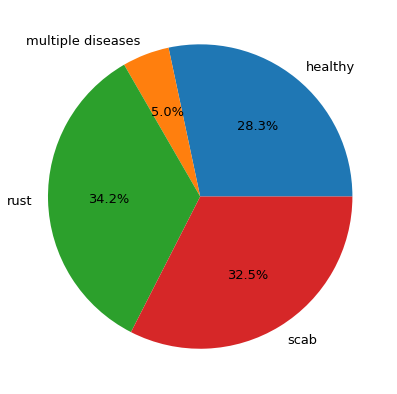

In [96]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rc('font', size = 13)

# 타깃값 라벨
labels = ['healthy', 'multiple diseases', 'rust', 'scab']

# 파이 차트 만들기 (칼럼수가 적을 때 유용, 많으면 막대그래프 이용)
fig, ax = plt.subplots(figsize = (7, 7))
ax.pie([len(healthy), len(multiple_diseases), len(rust), len(scab)],
      labels = labels,
      autopct = '%.1f%%')

plt.show()

## 이미지 출력 함수
- 이미지 ID를 전달 받아 화면에 이미지를 출력하는 show_pic() 함수 정의

In [97]:
import matplotlib.gridspec as gridspec 
import cv2 # OpenCV 라이브러리 (영상처리, 이미지처리 라이브러리)

DATA_PATH = '/kaggle/input/plant-pathology-2020-fgvc7'

# 6(2x3)개의 이미지만 출력
def show_pic(imgIDs, rows = 2, cols = 3):
    assert len(imgIDs) <= rows * cols # 이미지가 행/열 갯수보다 많으면 오류 발생
    
    plt.figure(figsize = (15, 8)) # 전체 이미지 크기 설정
    grid = gridspec.GridSpec(rows, cols) # 서브플롯 배치 
    
    # 이미지 출력
    for idx, imgID in enumerate(imgIDs):
        # 이미지 파일 경로 불러오기
        img_path = f'{DATA_PATH}/images/{imgID}.jpg'   # 이미지 파일 경로
        print(img_path)
        image = cv2.imread(img_path)                   # 이미지 파일 읽기
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
        ax = plt.subplot(grid[idx]) # 각 이미지를 서브플롯에 포함
        ax.imshow(image) # 이미지 출력

In [98]:
# 각 타깃값별 이미지 아이디 가져오기
img_nums = 6
last_healthy_imgIDs = healthy['image_id'][-img_nums:]
last_healthy_imgIDs

1807    Train_1807
1808    Train_1808
1810    Train_1810
1814    Train_1814
1817    Train_1817
1818    Train_1818
Name: image_id, dtype: object

/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1807.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1808.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1810.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1814.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1817.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1818.jpg


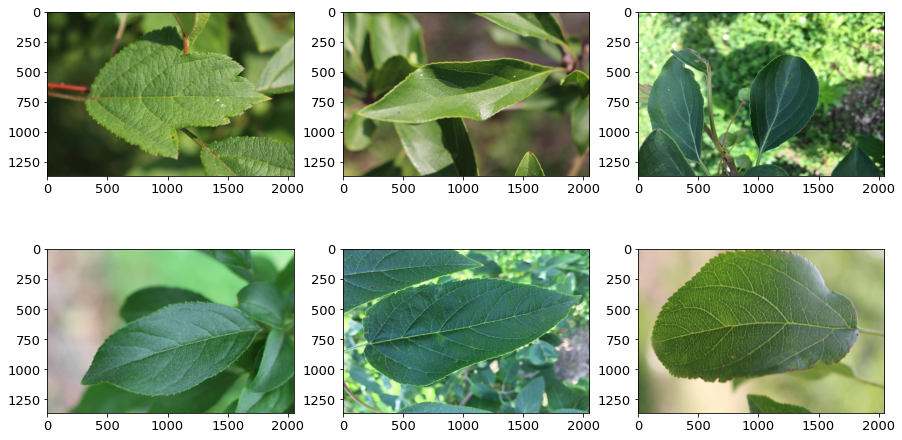

In [99]:
show_pic(last_healthy_imgIDs)

/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1664.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1708.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1779.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1780.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1784.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1815.jpg


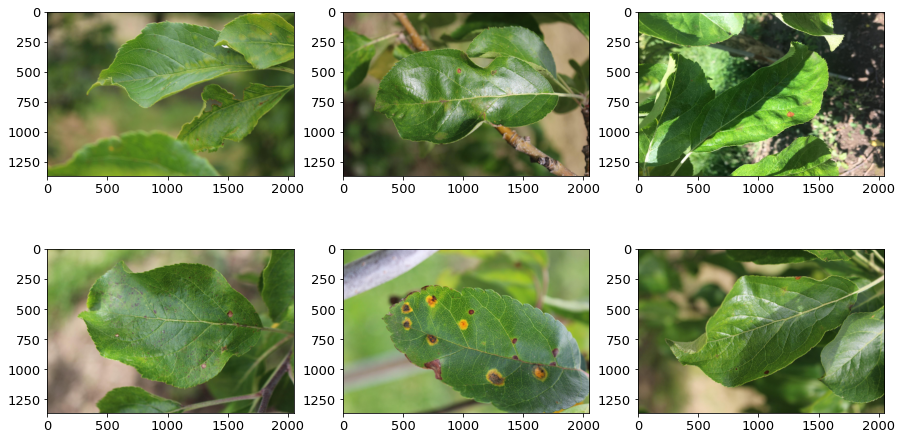

In [100]:
img_nums = 6
last_diseases_imgIDs = multiple_diseases['image_id'][-img_nums:]
last_diseases_imgIDs
show_pic(last_diseases_imgIDs)

/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1798.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1802.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1805.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1811.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1813.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1819.jpg


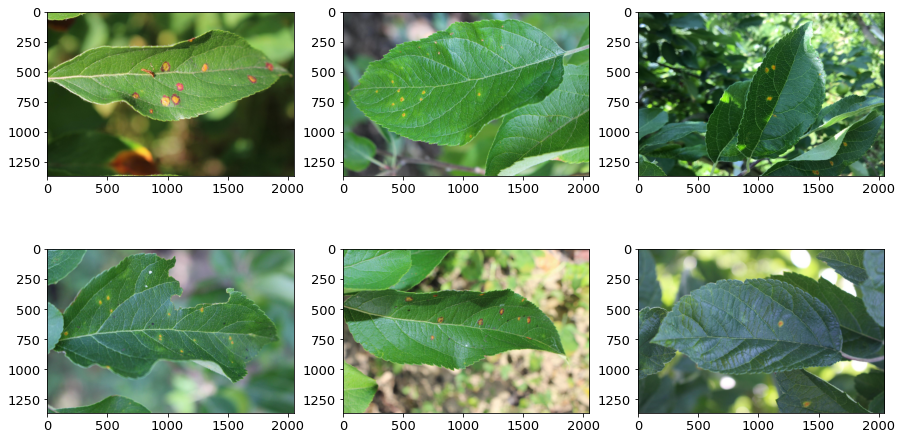

In [101]:
img_nums = 6
last_rust_imgIDs = rust['image_id'][-img_nums:]
last_rust_imgIDs
show_pic(last_rust_imgIDs)

/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1804.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1806.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1809.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1812.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1816.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1820.jpg


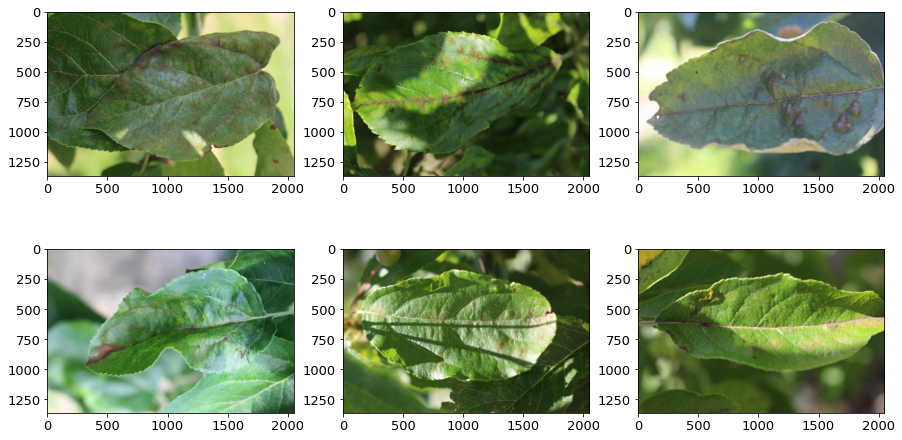

In [102]:
img_nums = 6
last_scab_imgIDs = scab['image_id'][-img_nums:]
last_scab_imgIDs
show_pic(last_scab_imgIDs)

## 파이토치 모델링
- 전이 학습 : 사전 훈련 모델을 활용한다.
- 족구를 배움
    + 축구선수 출신 지원 vs 일반인 지원
- 베이스라인 모델
    + 데이터 증강 : 다양한 변환기 적용
    + 신경망 모델 : 사전 훈련 모델(Efficientnet-b7)
    + 옵티마이저 : AdamW(adam의 단점을 보완)

In [103]:
import torch # 파이토치 
import random
import numpy as np
import os

# 시드값 고정
# 실험 재현성
seed = 50
os.environ['PYTHONHASHSEED'] = str(seed)

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# GPU 설정
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.enabled = False

### GPU 장비 설정
- 기본값 : CPU
- GPU 설정을 변경해줘야함

In [104]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

### 데이터 준비
- 타깃값이 골고루 분포가 되게끔 stratify 파라미터 조정

In [105]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(train, 
                                test_size = 0.1, 
                                stratify = train[['healthy', 'multiple_diseases', 'rust', 'scab']], 
                                random_state=42)
train.shape, valid.shape

((1638, 5), (183, 5))

## 데이터셋 클래스 정의
- 파이토치에 Dataset 클래스를 재정의
- 이미지 파일 자체가 필요한 것은 아님
- 이미지 파일을 수치 행렬로 변환
    + Dataset 클래스

In [106]:
import cv2
from torch.utils.data import Dataset # 데이터 생성을 위한 클래스
import numpy as np

class ImageDataset(Dataset):
    
    # 초기화 메서드(생성자)
    def __init__(self, df, img_dir = './', transform = None, is_test = False):
        super().__init__() # 상속받은 Dataset의 __init__() 메서드 호출
        self.df = df 
        self.img_dir = img_dir
        self.transform = transform
        self.is_test = is_test
        
    # 데이터셋 크기 반환 메서드
    def __len__(self):
        return len(self.df)
    
    # 인덱스(idx)에 해당하는 데이터 반환 메서드
    def __getitem__(self, idx):
        img_id   = self.df.iloc[idx, 0]              # 이미지 ID
        img_path = self.img_dir + img_id + '.jpg'  # 이미지 파일 경로
        image    = cv2.imread(img_path)               # 이미지 파일 읽기
        image    = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
        
        # 이미지 변환
        if self.transform is not None:
            image = self.transform(image=image)['image']
            
        # 테스트 데이터면 이미지 데이터만 변환, 그렇지 않으면 타깃값도 반환
        if self.is_test:
            return image # 테스트용
        else:
            # 타깃값 4개 중 가장 큰 값의 인덱스
            # 4개의 값[0.3, 0.5, 0.2, 0.3] --> [0, 1, 2, 3] --> 1
            # 4개의 값[0.5, 0.4, 0.2, 0.3] --> [0, 1, 2, 3] --> 0
            # ['healthy', 'multiple_diseases', 'rust', 'scab']
            label = np.argmax(self.df.iloc[idx, 1:5])
            
            return image, label # 훈련/ 검증용일 때만 사용

## 이미지 변환기 정의
- albumentations 라이브러리 활용
- 훈련 데이터용 변환기
- 검증 및 테스트 데이터용 변환기 정의

In [107]:
# 훈련 데이터용 변환기
import albumentations as A
from albumentations.pytorch import ToTensorV2

transform_train = A.Compose([
    A.Resize(450, 650),              # 이미지 크기 조절
    A.RandomBrightnessContrast(brightness_limit = 0.2, 
                               contrast_limit = 0.2, p = 0.3),     # 밝기 대비 조절
    A.VerticalFlip(p=0.2),         # 상하 대칭 변환
    A.HorizontalFlip(p=0.5),       # 좌우 대칭 변환
    A.ShiftScaleRotate(              # 이동, 스케일링, 회전 변환
        shift_limit = 0.1,
        scale_limit = 0.2,
        rotate_limit = 30, p = 0.3),
    A.OneOf([A.Emboss(p=1), A.Sharpen(p=1),       # 양각화, 날카로움, 블러링 효과
             A.Blur(p=1)], p=0.3),
    A.PiecewiseAffine(p=0.3),      # 어파인 효과
    A.Normalize(),                   # 정규화 변환
    ToTensorV2()                       # 텐서로 변환
])

In [108]:
# 검증 및 테스트 데이터용 변환기
transform_test = A.Compose([
    A.Resize(450, 650),              # 이미지 크기 조절
    A.Normalize(),                   # 정규화 변환
    ToTensorV2()                     # 텐서로 변환
])

## 데이터셋 및 데이터 로더 생성
- 데이터 준비의 마지막 단계
- 훈련 데이터셋은 훈련용 변환기
- 검증 데이터셋은 검증/테스트용 변환기를 전달

In [109]:
img_dir = '/kaggle/input/plant-pathology-2020-fgvc7/images/'

dataset_train = ImageDataset(train, img_dir = img_dir, transform = transform_train)
dataset_valid = ImageDataset(train, img_dir = img_dir, transform = transform_test)

- 멀티 프로세싱 활용 함수

In [110]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
    
g = torch.Generator()
g.manual_seed(0)

- 데이터 로더 생성

In [111]:
from torch.utils.data import DataLoader # 데이터 로더 클래스
batch_size = 4
loader_train = DataLoader(dataset_train, 
                          batch_size = batch_size, 
                          shuffle = True, 
                          worker_init_fn = seed_worker, 
                          generator = g, num_workers = 2)

loader_valid = DataLoader(dataset_valid, 
                          batch_size = batch_size, 
                          shuffle = False, 
                          worker_init_fn = seed_worker, 
                          generator = g, num_workers = 2)

## 모델 생성
- 사전 훈련 모델 활용
- Pytorch에서 사준 훈련 모델을 이용하는 방법은 크게 3가지
    + torvision.models
    + pretrainedmodels (현재 우리 선택)
    + 직접 구현한 모델 (거의 가능성 0)

In [112]:
!pip install efficientnet-pytorch==0.7.1

In [113]:
from efficientnet_pytorch import EfficientNet # EfficientNet 모델
# 사전 훈련된 efficientnet-b7 모델 불러오기
model = EfficientNet.from_pretrained('efficientnet-b7', num_classes=4) 
model = model.to(device) # 장비 할당

Loaded pretrained weights for efficientnet-b7


- 손실 함수와 옵티마이저 설정
- 모델 훈련 및 성능 검증
- AdamW 논문 : https://arxiv.org/abs/1711.05101

In [114]:
import torch.nn as nn # 신경망 모듈

# 손실 함수
criterion = nn.CrossEntropyLoss()

# 옵티마이저
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00006, weight_decay=0.0001)

- 모델 학습하기

In [115]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수
from tqdm.notebook import tqdm # 진행률 표시 막대 

epochs = 5

# 총 에폭만큼 반복
for epoch in range(epochs):
    # == [ 훈련 ] ==============================================
    model.train()        # 모델을 훈련 상태로 설정 
    epoch_train_loss = 0 # 에폭별 손실값 초기화 (훈련 데이터용)
    
    # '반복 횟수'만큼 반복 
    for images, labels in tqdm(loader_train):
        # 이미지, 레이블(타깃값) 데이터 미니배치를 장비에 할당 
        images = images.to(device)
        labels = labels.to(device)
        
        # 옵티마이저 내 기울기 초기화
        optimizer.zero_grad()
        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        # 손실 함수를 활용해 outputs와 labels의 손실값 계산
        loss = criterion(outputs, labels)
        # 현재 배치에서의 손실 추가 (훈련 데이터용)
        epoch_train_loss += loss.item() 
        loss.backward() # 역전파 수행
        optimizer.step() # 가중치 갱신
    # 훈련 데이터 손실값 출력
    print(f'에폭 [{epoch+1}/{epochs}] - 훈련 데이터 손실값 : {epoch_train_loss/len(loader_train):.4f}')
    
    # == [ 검증 ] ==============================================
    model.eval()          # 모델을 평가 상태로 설정 
    epoch_valid_loss = 0  # 에폭별 손실값 초기화 (검증 데이터용)
    preds_list = []       # 예측 확률값 저장용 리스트 초기화 
    true_onehot_list = [] # 실제 타깃값 저장용 리스트 초기화 
    
    with torch.no_grad(): # 기울기 계산 비활성화
        # 미니배치 단위로 검증
        for images, labels in loader_valid:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            epoch_valid_loss += loss.item()
            
            preds = torch.softmax(outputs.cpu(), dim=1).numpy() # 예측 확률값
            # 실제값 (원-핫 인코딩 형식)
            true_onehot = torch.eye(4)[labels].cpu().numpy()  
            # 예측 확률값과 실제값 저장
            preds_list.extend(preds)
            true_onehot_list.extend(true_onehot)
    # 검증 데이터 손실값 및 ROC AUC 점수 출력 
    print(f'에폭 [{epoch+1}/{epochs}] - 검증 데이터 손실값 : {epoch_valid_loss/len(loader_valid):.4f} / 검증 데이터 ROC AUC : {roc_auc_score(true_onehot_list, preds_list):.4f}')  

  0%|          | 0/410 [00:00<?, ?it/s]

KeyboardInterrupt: 

## 예측 및 결과 제출
- 훈련 끝났으면 예측을 합니다.

In [ ]:
dataset_test = ImageDataset(test, img_dir=img_dir, 
                            transform=transform_test, is_test=True)
loader_test = DataLoader(dataset_test, batch_size=batch_size, 
                         shuffle=False, worker_init_fn=seed_worker,
                         generator=g, num_workers=2)

- 테스트 데이터 활용해서 타깃 확률 예측한다.

In [ ]:
model.eval() # 모델을 평가 상태로 설정 

preds = np.zeros((len(test), 4)) # 예측값 저장용 배열 초기화

with torch.no_grad():
    for i, images in enumerate(loader_test):
        images = images.to(device)
        outputs = model(images)
        # 타깃 예측 확률 
        preds_part = torch.softmax(outputs.cpu(), dim=1).squeeze().numpy()
        preds[i*batch_size:(i+1)*batch_size] += preds_part

In [ ]:
submission[['healthy', 'multiple_diseases', 'rust', 'scab']] = preds
submission.to_csv('submission.csv', index=False)